## Installation and Setup

In [1]:
pip install tensorflow


  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.14.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Precprocessing Phase

In [8]:
training_data = pd.read_csv('training_set.csv')

In [9]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-08,57.505501,58.400002,56.368198,57.448502,57.448502,38648000
1,2018-10-09,57.307499,57.717499,56.878601,56.941002,56.941002,26174000
2,2018-10-10,56.554001,56.608501,54.056499,54.061001,54.061001,53514000
3,2018-10-11,53.646999,55.320000,53.413502,53.966000,53.966000,58980000
4,2018-10-12,55.400002,55.750000,54.320099,55.504002,55.504002,42026000


In [10]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-09-29,134.080002,134.889999,131.320007,131.850006,131.850006,23224200
1253,2023-10-02,132.154999,135.360001,132.065002,135.169998,135.169998,19210400
1254,2023-10-03,134.929993,135.240005,132.815002,133.300003,133.300003,19628700
1255,2023-10-04,133.660004,136.570007,133.429993,136.270004,136.270004,22848000
1256,2023-10-05,136.130005,136.500000,134.455002,135.990005,135.990005,15922900


In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [12]:
training_set = training_data.iloc[:,1:2].values

In [14]:
training_set.shape , training_data.shape

((1257, 1), (1257, 7))

## Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [20]:
training_set_scaled

array([[0.08539914],
       [0.08347993],
       [0.07617637],
       ...,
       [0.83586557],
       [0.82355572],
       [0.84749715]])

## Creating a data structure with 60 timesteps and 1 output

In [27]:
X_train = []
y_train = []

for i in range(60,1257):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
X_train

array([[0.08539914, 0.08347993, 0.07617637, ..., 0.03734667, 0.02067975,
        0.03251961],
       [0.08347993, 0.07617637, 0.04799914, ..., 0.02067975, 0.03251961,
        0.02844377],
       [0.07617637, 0.04799914, 0.06499079, ..., 0.03251961, 0.02844377,
        0.04730127],
       ...,
       [0.68213654, 0.659746  , 0.68436593, ..., 0.79476784, 0.82762671,
        0.80896788],
       [0.659746  , 0.68436593, 0.70607796, ..., 0.82762671, 0.80896788,
        0.83586557],
       [0.68436593, 0.70607796, 0.74087537, ..., 0.80896788, 0.83586557,
        0.82355572]])

In [29]:
y_train

array([0.02844377, 0.04730127, 0.04953547, ..., 0.83586557, 0.82355572,
       0.84749715])

In [30]:
X_train.shape

(1197, 60)

In [31]:
X_train = X_train.reshape(1197,60,1)

In [32]:
X_train.shape

(1197, 60, 1)

## Building LSTM

In [33]:
# define an object (intializing RNN)
model = tf.keras.models.Sequential()

In [34]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [35]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

## Training the model

In [39]:
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
38/38 [==============================] - 24s 313ms/step - loss: 0.0670
Epoch 2/100
38/38 [==============================] - 11s 295ms/step - loss: 0.0085
Epoch 3/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0061
Epoch 4/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 12s 322ms/step - loss: 0.0062
Epoch 6/100
38/38 [==============================] - 12s 322ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 12s 311ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 12s 315ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 12s 325ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 12s 308ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 12s 309ms/step - loss: 0.0044
E

## Making Predictions

In [40]:
# getting the real stock prices of month Nov 2019
test_data = pd.read_csv('test_set.csv')

In [41]:
test_data.shape


(22, 7)

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       22 non-null     object 
 1   Open       22 non-null     float64
 2   High       22 non-null     float64
 3   Low        22 non-null     float64
 4   Close      22 non-null     float64
 5   Adj Close  22 non-null     float64
 6   Volume     22 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.3+ KB


In [43]:
real_stock_price = test_data.iloc[:, 1:2].values

In [44]:
real_stock_price.shape

(22, 1)

In [46]:
# Getting predicted stock prices of month Nov 2019

# concatination
dataset_total = pd.concat((training_data['Open'], test_data['Open']), axis = 0)

# stock prices of previous 60 days for each day of Nov 2019
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values

# reshape (convert into numpy array)
inputs = inputs.reshape(-1,1)

# feature scaling
inputs = sc.transform(inputs)

# creating a test set

X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])

# convert in numpy array
X_test = np.array(X_test)

# convert in 3D (required to process)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# getting predicted stock prices
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


In [47]:
print(predicted_stock_price[5]), print(real_stock_price[5])

[136.30319]
[135.899994]


(None, None)

## Visualisation

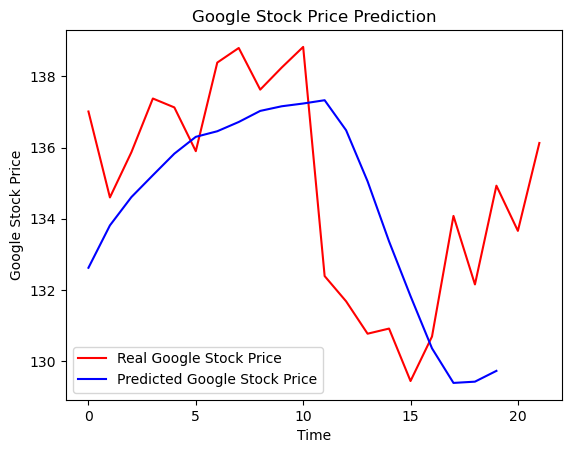

In [48]:
# Visualising the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()